<a href="https://colab.research.google.com/github/Yash-Nair/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [74]:
df = pd.read_csv('/content/drive/MyDrive/AIML/Heart_Disease_Prediction.csv')

In [75]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [77]:
df.shape

(270, 14)

### Splitting Dataset



In [78]:
y = df['Heart Disease']
x = df.drop('Heart Disease', axis=1)

In [79]:
y.head()

,Heart Disease
0,Presence
1,Absence
2,Presence
3,Absence
4,Absence


###Label Encoding

In [80]:
lbl = LabelEncoder()
y_encoded = lbl.fit_transform(y)

In [81]:
y_encoded

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

### Checking Missing Values & Duplicates

In [83]:
df.duplicated().sum()

np.int64(0)

In [84]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [85]:
(df == 0).sum()

,0
Age,0
Sex,87
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,230
EKG results,131
Max HR,0
Exercise angina,181
ST depression,85


###Exploratory Data Analysis

In [86]:
df[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']].describe()

,Age,BP,Cholesterol,Max HR,ST depression
count,270.000000,270.000000,270.000000,270.000000,270.00000
mean,54.433333,131.344444,249.659259,149.677778,1.05000
std,9.109067,17.861608,51.686237,23.165717,1.14521
min,29.000000,94.000000,126.000000,71.000000,0.00000
25%,48.000000,120.000000,213.000000,133.000000,0.00000
50%,55.000000,130.000000,245.000000,153.500000,0.80000
75%,61.000000,140.000000,280.000000,166.000000,1.60000
max,77.000000,200.000000,564.000000,202.000000,6.20000


In [87]:
df['Sex'].value_counts()

,count
Sex,
1,183
0,87


In [88]:
df['Chest pain type'].value_counts()

,count
Chest pain type,
4,129
3,79
2,42
1,20


In [89]:
df['FBS over 120'].value_counts()

,count
FBS over 120,
0,230
1,40


In [90]:
df['EKG results'].value_counts()

,count
EKG results,
2,137
0,131
1,2


In [91]:
df['Exercise angina'].value_counts()

,count
Exercise angina,
0,181
1,89


In [92]:
df['Slope of ST'].value_counts()

,count
Slope of ST,
1,130
2,122
3,18


In [93]:
df['Number of vessels fluro'].value_counts()

,count
Number of vessels fluro,
0,160
1,58
2,33
3,19


In [94]:
df['Thallium'].value_counts()

,count
Thallium,
3,152
7,104
6,14


In [95]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest pain type'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FBS over 120'}>,
        <Axes: title={'center': 'EKG results'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercise angina'}>,
        <Axes: title={'center': 'ST depression'}>,
        <Axes: title={'center': 'Slope of ST'}>,
        <Axes: title={'center': 'Number of vessels fluro'}>],
       [<Axes: title={'center': 'Thallium'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

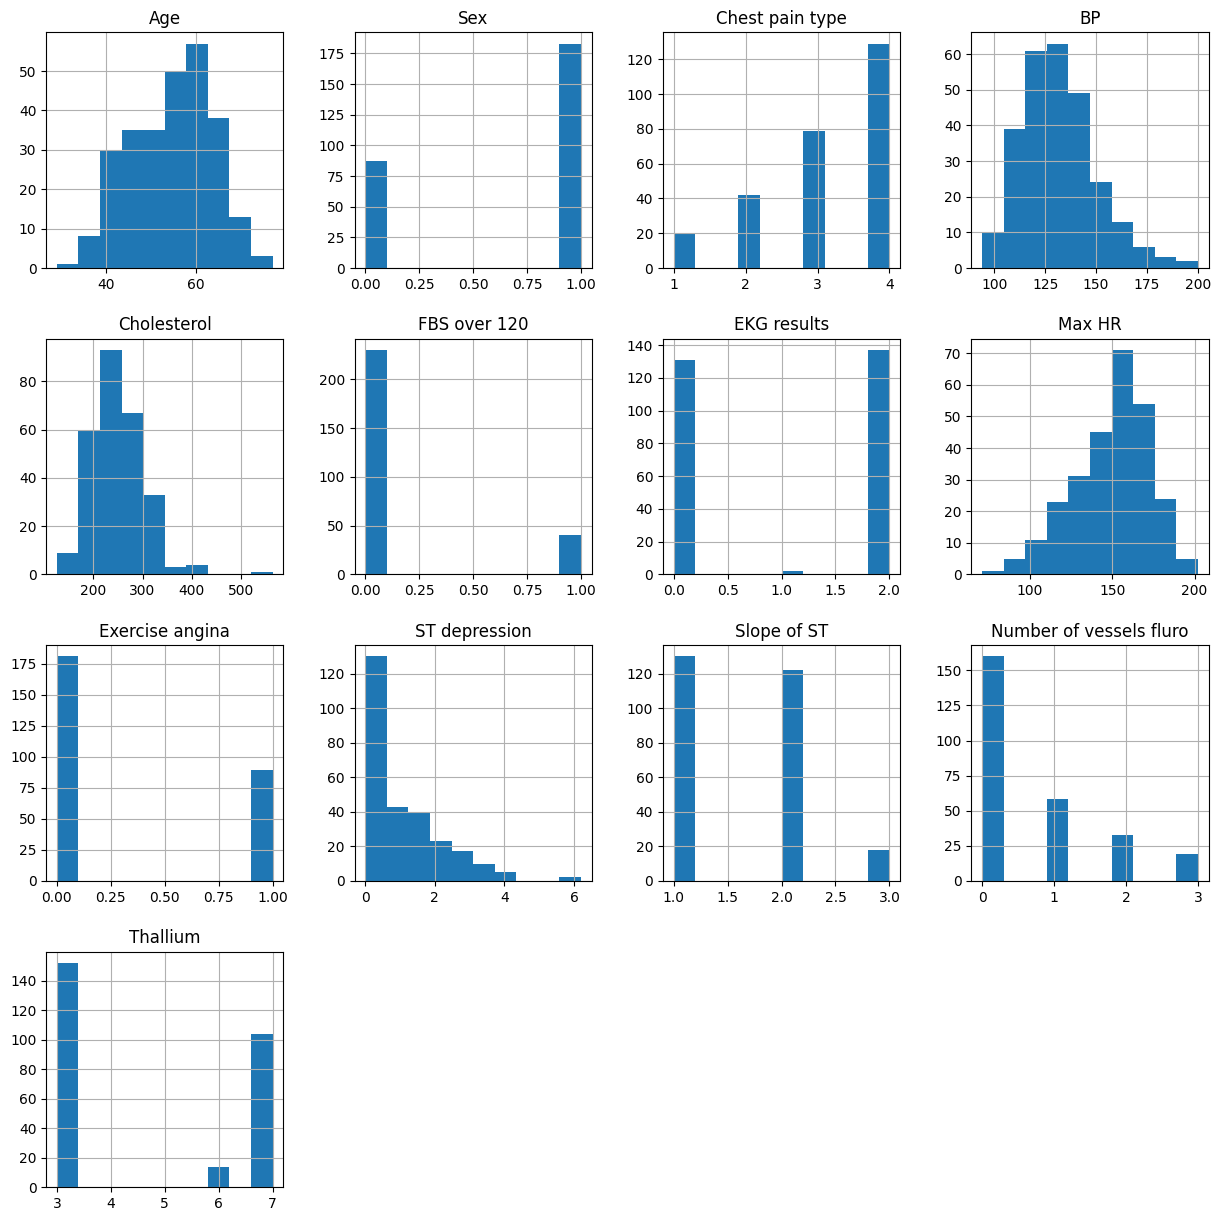

In [96]:
df.hist(figsize=(15,15))

In [97]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [98]:
x_train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
182,41,1,4,110,172,0,2,158,0,0.0,1,0,7
73,76,0,3,140,197,0,1,116,0,1.1,2,0,3
18,64,1,1,110,211,0,2,144,1,1.8,2,0,3
101,67,1,4,120,237,0,0,71,0,1.0,2,0,3
195,55,0,2,135,250,0,2,161,0,1.4,2,0,3


/tmp/ipython-input-3745941574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='pastel')


<Axes: xlabel='Heart Disease', ylabel='count'>

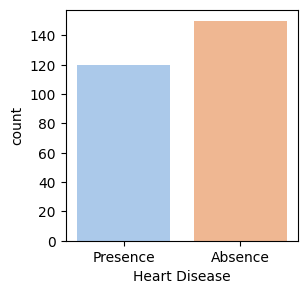

In [99]:
plt.figure(figsize=(3,3))
sns.countplot(x='Heart Disease', data=df, palette='pastel')

In [100]:
cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
num_features = df[cols]

/tmp/ipython-input-2035369489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease',y=cols, data=df, palette='pastel')


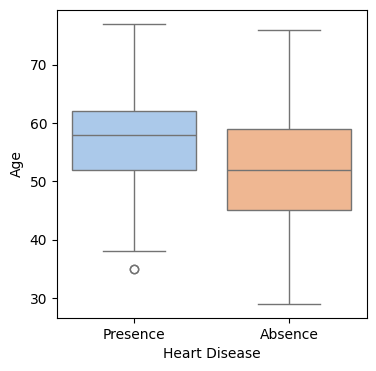

/tmp/ipython-input-2035369489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease',y=cols, data=df, palette='pastel')


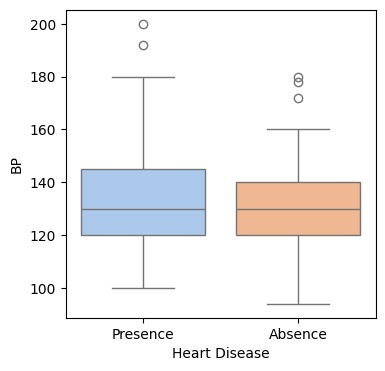

/tmp/ipython-input-2035369489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease',y=cols, data=df, palette='pastel')


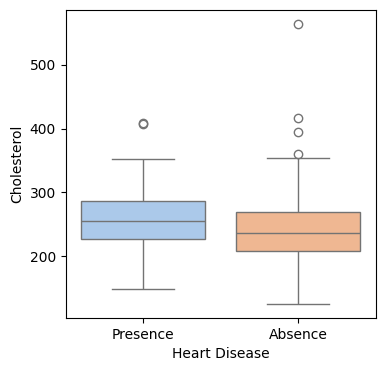

/tmp/ipython-input-2035369489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease',y=cols, data=df, palette='pastel')


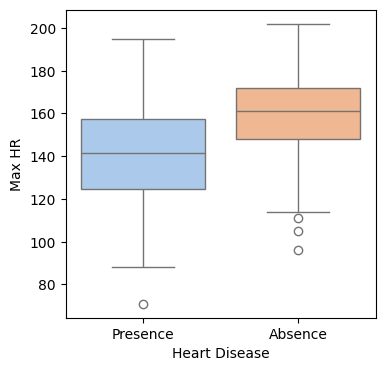

/tmp/ipython-input-2035369489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease',y=cols, data=df, palette='pastel')


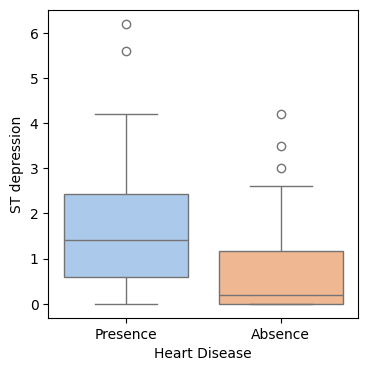

In [101]:
for cols in num_features :
  plt.figure(figsize=(4,4))
  sns.boxplot(x='Heart Disease',y=cols, data=df, palette='pastel')
  plt.show()

In [102]:
x_train.describe().loc[['min', 'max']]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
min,29.0,0.0,1.0,94.0,141.0,0.0,0.0,71.0,0.0,0.0,1.0,0.0,3.0
max,76.0,1.0,4.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,3.0,3.0,7.0


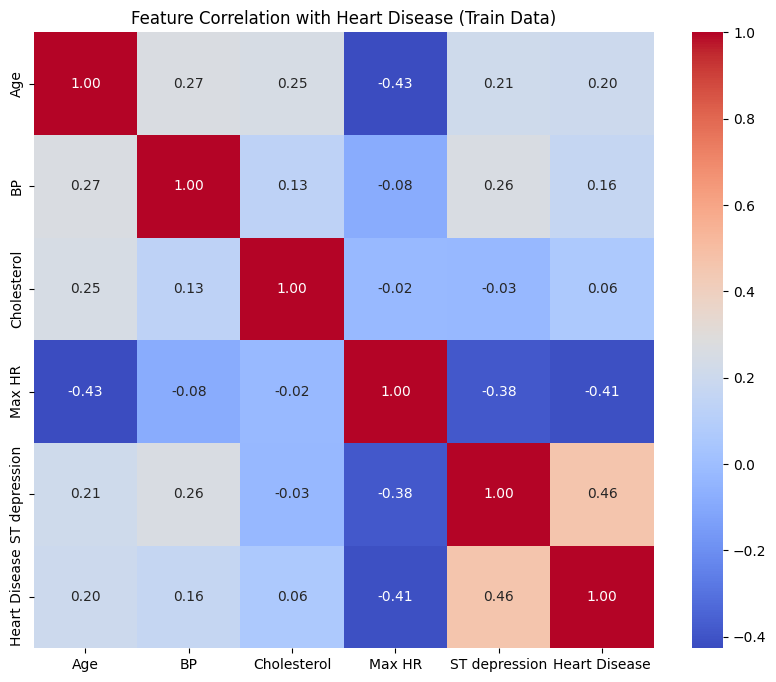

In [103]:
# Combine X_train and y_train
train_corr_df = x_train.copy()
train_corr_df['Heart Disease'] = y_train

# Select numeric columns including target
cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease']

corr_matrix = train_corr_df[cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Heart Disease (Train Data)")
plt.show()

In [104]:
def cramers_v(x, y):
    """
    Compute Cramér's V statistic for categorical-categorical association
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt((chi2 / n) / min_dim)

In [105]:
cols = ['Sex','Chest pain type','FBS over 120', 'EKG results', 'Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium','Heart Disease']
cat_features = train_corr_df[cols]

In [106]:
cramers_results = {}

for col in cat_features:
    cramers_results[col] = cramers_v(df[col], train_corr_df['Heart Disease'])

# Convert to DataFrame for heatmap
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Heart Disease'])

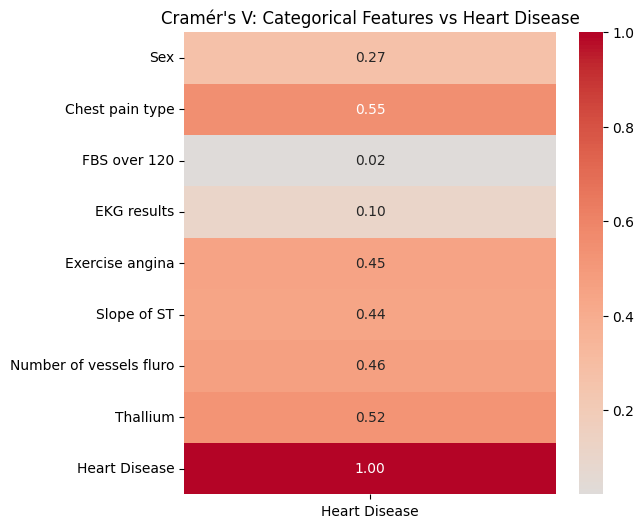

In [107]:
plt.figure(figsize=(6, 6))
sns.heatmap(cramers_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Cramér's V: Categorical Features vs Heart Disease")
plt.show()

In [108]:
x_train_sel = x_train.drop(['Age', 'BP', 'Cholesterol', 'Sex', 'FBS over 120', 'EKG results'], axis=1)
x_test = x_test.drop(['Age', 'BP', 'Cholesterol', 'Sex', 'FBS over 120', 'EKG results'], axis=1)

In [109]:
x_train_sel

,Chest pain type,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
182,4,158,0,0.0,1,0,7
73,3,116,0,1.1,2,0,3
18,1,144,1,1.8,2,0,3
101,4,71,0,1.0,2,0,3
195,2,161,0,1.4,2,0,3
...,...,...,...,...,...,...,...
20,4,129,1,2.6,2,2,7
188,4,157,0,1.2,2,0,3
71,4,163,1,0.6,1,0,3
106,3,143,1,1.2,2,0,3


In [110]:
y_train

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0])

### Models Without Optimisation

In [111]:
scaler = RobustScaler()

x_train_scaled = pd.DataFrame(
    scaler.fit_transform(x_train_sel),
    columns=x_train_sel.columns,
    index=x_train_sel.index
)

x_test_scaled = pd.DataFrame(
    scaler.transform(x_test),
    columns=x_test.columns,
    index=x_test.index
)

In [112]:
smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

x_train_res = pd.DataFrame(
    x_train_res,
    columns=x_train_scaled.columns
)


In [113]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NB":GaussianNB(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

In [114]:
def evaluate_models(models, x_train, y_train, x_test, y_test):

  results = {}

  for name, model in models.items():

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    results[name] = {
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred),
      'recall': recall_score(y_test, y_pred),
      'f1_score': f1_score(y_test, y_pred),
      'roc_auc': roc_auc_score(y_test, y_prob)
    }

  return results

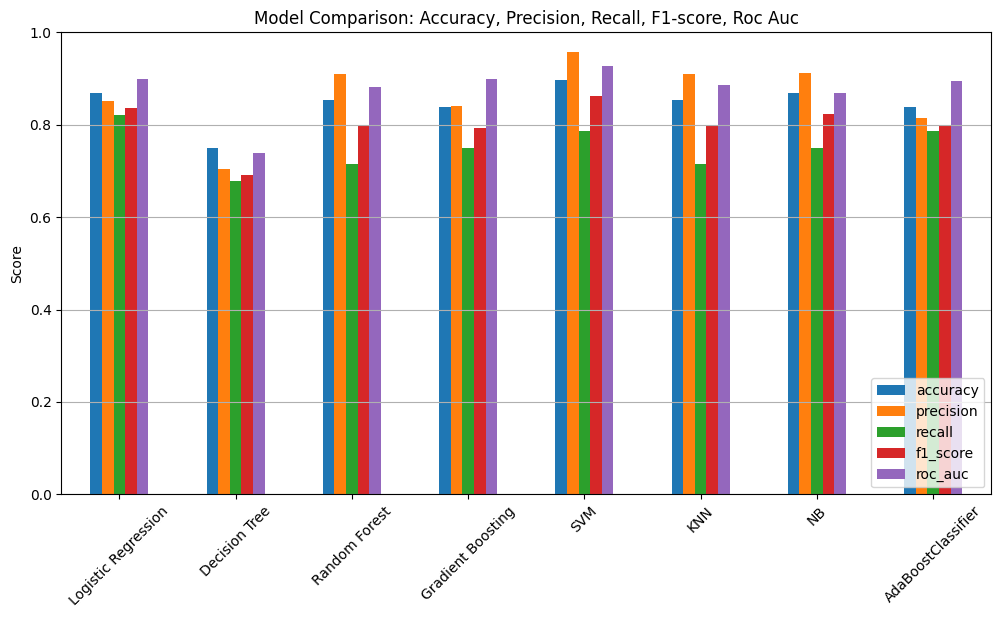

In [115]:
accuracy_results = evaluate_models(models, x_train_res, y_train_res, x_test_scaled, y_test)

accuracy_results = pd.DataFrame(accuracy_results).T
accuracy_results.plot(
    kind='bar',
    figsize=(12,6)
)

plt.title('Model Comparison: Accuracy, Precision, Recall, F1-score, Roc Auc')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

In [116]:
accuracy_results

,accuracy,precision,recall,f1_score,roc_auc
Logistic Regression,0.867647,0.851852,0.821429,0.836364,0.899107
Decision Tree,0.750000,0.703704,0.678571,0.690909,0.739286
Random Forest,0.852941,0.909091,0.714286,0.800000,0.882589
Gradient Boosting,0.838235,0.840000,0.750000,0.792453,0.900000
SVM,0.897059,0.956522,0.785714,0.862745,0.927679
KNN,0.852941,0.909091,0.714286,0.800000,0.887054
NB,0.867647,0.913043,0.750000,0.823529,0.869643
AdaBoostClassifier,0.838235,0.814815,0.785714,0.800000,0.893750


In [117]:
len(x_test)

68

In [118]:
pd.Series(y_test).value_counts()

,count
0,40
1,28


In [119]:
cm_table = []

for name, model in models.items():
  tn, fp, fn, tp = confusion_matrix(y_test, model.predict(x_test)).ravel()
  cm_table.append({
      "Name": name,
      "TP": tp,
      "FP": fp,
      "FN": fn,
      "TN": tn
  })

cm = pd.DataFrame(cm_table)
print(cm)

                  Name  TP  FP  FN  TN
0  Logistic Regression   0   0  28  40
1        Decision Tree  28  40   0   0
2        Random Forest  28  40   0   0
3    Gradient Boosting  28  40   0   0
4                  SVM  28  40   0   0
5                  KNN   0   0  28  40
6                   NB  28  40   0   0
7   AdaBoostClassifier  28  40   0   0


In [120]:
for name, model in models.items() :
  print(name, " : " , model.predict(x_test))
  print("")

Logistic Regression  :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Decision Tree  :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Random Forest  :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Gradient Boosting  :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

SVM  :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

KNN  :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

NB  :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

###Models with Optimisation

In [121]:
def train_evaluate_gridsearch(
    pipeline,
    param_grid,
    X_train,
    y_train,
    X_test,
    y_test,
):

    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    )

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    print("Best CV ROC-AUC:", grid.best_score_)
    print("Best parameters:", grid.best_params_)

    best_model = grid.best_estimator_

    # ROC-AUC scoring
    if hasattr(best_model, "predict_proba"):
        y_test_scores = best_model.predict_proba(X_test)[:, 1]
    else:
        y_test_scores = best_model.decision_function(X_test)

    # ✅ IMPORTANT
    return best_model, grid


In [122]:
def test_results(model_name, y_test, y_pred, y_prob):
    results = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_prob)
    }

    return results

In [123]:
def get_oof_predictions(model, X_train, y_train, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    oof_probs = cross_val_predict(
        model,
        X_train,
        y_train,
        cv=cv,
        method='predict_proba' if hasattr(model, 'predict_proba') else 'decision_function',
        n_jobs=-1
    )

    if hasattr(model, 'predict_proba'):
        oof_probs = oof_probs[:, 1]  # probability of positive class

    return oof_probs

In [124]:
def threshold_tuning_high_recall_from_probs(y_true, y_prob, min_recall=0.9):
    """
    Tune threshold for given predicted probabilities to achieve minimum recall, then maximize F1.

    Parameters:
    -----------
    y_true : array-like, true labels
    y_prob : array-like, predicted probabilities for positive class
    min_recall : float, minimum recall constraint (default 0.9)

    Returns:
    --------
    y_pred_tuned : array of predictions after threshold tuning
    best_threshold : float, threshold used
    metrics_dict : dict, recall, precision, f1 at the tuned threshold
    """

    # Compute precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

    # precision & recall arrays have one extra element than thresholds
    precision = precision[:-1]
    recall = recall[:-1]

    # Filter thresholds where recall >= min_recall
    valid_idxs = np.where(recall >= min_recall)[0]

    if len(valid_idxs) == 0:
        raise ValueError(f"No threshold meets the minimum recall of {min_recall}")

    # Compute F1 for valid thresholds
    f1_scores = 2 * (precision[valid_idxs] * recall[valid_idxs]) / (precision[valid_idxs] + recall[valid_idxs] + 1e-8)

    # Pick threshold with maximum F1
    best_idx = valid_idxs[np.argmax(f1_scores)]
    best_threshold = thresholds[best_idx]

    # Generate tuned predictions
    y_pred_tuned = (y_prob >= best_threshold).astype(int)

    return y_pred_tuned, best_threshold


In [125]:
num_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

cat_features = [
    'Chest pain type',
    'EKG results',
    'Thallium'
]

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'  # keeps binary features as-is
)

In [127]:
all_results = []

In [128]:
cm = []

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

###Logistic Regression

In [130]:
pipeline_lr = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver':  ['liblinear','saga'],  # supports both l1 & l2
    'model__class_weight': [None, 'balanced']
}

lr, grid_lr = train_evaluate_gridsearch(
    pipeline_lr,
    param_grid_lr,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best CV ROC-AUC: 0.9164274322169058
Best parameters: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'saga'}


#####Test Data Results without threshold tuning




In [131]:
lr_pred = lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:,1]

lr_results = test_results('Logistic Regression', y_test, lr_pred, lr_prob )

In [132]:
pd.DataFrame(lr_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.823529,0.944444,0.607143,0.73913,0.934821


In [133]:
cv_results_lr = grid_lr.cv_results_

mean_auc_lr = grid_lr.best_score_
std_auc_lr = cv_results_lr['std_test_score'][grid_lr.best_index_]

print(f"CV ROC-AUC: {mean_auc_lr:.3f} ± {std_auc_lr:.3f}")

CV ROC-AUC: 0.916 ± 0.047


#####Theshold Tuning using oofs

In [134]:
lr_oof_probs = get_oof_predictions(lr, x_train, y_train)

In [135]:
lr_oof_pred, lr_threshold = threshold_tuning_high_recall_from_probs(y_train, lr_oof_probs)

In [136]:
lr_threshold

np.float64(0.39132705586317595)

In [137]:
lr_oof_results = test_results('Logistic Regression', y_train, lr_oof_pred, lr_oof_probs )

In [138]:
pd.DataFrame(lr_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.826733,0.761468,0.902174,0.825871,0.904842


#####Test Data Results after Tuning

In [139]:
lr_pred_tuned = (lr_prob >= lr_threshold).astype(int)

In [140]:
lr_tuned_results = test_results('Logistic Regression', y_test, lr_pred_tuned, lr_prob)

In [141]:
pd.DataFrame(lr_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.83871,0.934821


In [142]:
all_results.append(lr_tuned_results)

In [143]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_tuned).ravel()

In [144]:
cm.append({
    "Model": "Logistic Regression",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [145]:
pd.DataFrame(cm, index=[0])

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26


In [146]:
pd.DataFrame(all_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.83871,0.934821


###Support Vector Machine

In [147]:
pipeline_svm = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC(probability=True))
])

param_grid_svm = [
    {
        'model__kernel': ['linear'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__class_weight': [None, 'balanced']
    },
    {
        'model__kernel': ['rbf'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__gamma': ['scale', 0.01, 0.1, 1],
        'model__class_weight': [None, 'balanced']
    }
]

svm, grid_svm = train_evaluate_gridsearch(
    pipeline_svm,
    param_grid_svm,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV ROC-AUC: 0.917304625199362
Best parameters: {'model__C': 1, 'model__class_weight': None, 'model__gamma': 0.01, 'model__kernel': 'rbf'}


#####Testing without threshold tuning

In [148]:
svm_pred = svm.predict(x_test)
svm_prob = svm.predict_proba(x_test)[:,1]

svm_results = test_results('Support Vector Machine', y_test, svm_pred, svm_prob )

In [149]:
pd.DataFrame(svm_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Support Vector Machine,0.838235,0.904762,0.678571,0.77551,0.934821


In [150]:
cv_results_svm = grid_svm.cv_results_

mean_auc_svm = grid_svm.best_score_
std_auc_svm = cv_results_svm['std_test_score'][grid_svm.best_index_]

print(f"CV ROC-AUC: {mean_auc_svm:.3f} ± {std_auc_svm:.3f}")

CV ROC-AUC: 0.917 ± 0.047


#####Threshold tuning using oofs


In [151]:
svm_oof_probs = get_oof_predictions(svm, x_train, y_train)

In [152]:
svm_oof_pred, svm_threshold = threshold_tuning_high_recall_from_probs(y_train, svm_oof_probs)

In [153]:
svm_threshold

np.float64(0.3321920540173074)

In [154]:
svm_oof_results = test_results('Support Vector Machine', y_train, svm_oof_pred, svm_oof_probs )

In [155]:
pd.DataFrame(svm_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Support Vector Machine,0.816832,0.747748,0.902174,0.817734,0.90504


#####Test Data Results after Tuning

In [156]:
svm_pred_tuned = (svm_prob >= svm_threshold).astype(int)

In [157]:
svm_tuned_results = test_results('Support Vector Machine', y_test, svm_pred_tuned, svm_prob)

In [158]:
pd.DataFrame(svm_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Support Vector Machine,0.852941,0.764706,0.928571,0.83871,0.934821


In [159]:
all_results.append(svm_tuned_results)

In [160]:
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred_tuned).ravel()

In [161]:
cm.append({
    "Model": "Support Vector Machine",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [162]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26


In [163]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.83871,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.83871,0.934821


###KNN

In [165]:
pipeline_knn = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

param_grid_knn = {
    'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

knn, grid_knn = train_evaluate_gridsearch(
    pipeline_knn,
    param_grid_knn,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best CV ROC-AUC: 0.905077086656034
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 21, 'model__weights': 'distance'}


#####Testing without threshold tuning

In [166]:
knn_pred = knn.predict(x_test)
knn_prob = knn.predict_proba(x_test)[:,1]

knn_results = test_results('KNN', y_test, knn_pred, knn_prob )

In [167]:
pd.DataFrame(knn_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,KNN,0.852941,0.909091,0.714286,0.8,0.897321


In [168]:
cv_results_knn = grid_knn.cv_results_

mean_auc_knn = grid_knn.best_score_
std_auc_knn = cv_results_knn['std_test_score'][grid_knn.best_index_]

print(f"CV ROC-AUC: {mean_auc_knn:.3f} ± {std_auc_knn:.3f}")

CV ROC-AUC: 0.905 ± 0.051


#####Threshold tuning using oofs


In [169]:
knn_oof_probs = get_oof_predictions(knn, x_train, y_train)

In [170]:
knn_oof_pred, knn_threshold = threshold_tuning_high_recall_from_probs(y_train, knn_oof_probs)

In [171]:
knn_threshold

np.float64(0.2390955345286154)

In [172]:
knn_oof_results = test_results('KNN', y_train, knn_oof_pred, knn_oof_probs )

In [173]:
pd.DataFrame(knn_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,KNN,0.787129,0.705882,0.913043,0.796209,0.900198


#####Test Data Results after Tuning

In [174]:
knn_pred_tuned = (knn_prob >= knn_threshold).astype(int)

In [175]:
knn_tuned_results = test_results('KNN', y_test, knn_pred_tuned, knn_prob)

In [176]:
pd.DataFrame(knn_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,KNN,0.779412,0.675676,0.892857,0.769231,0.897321


In [177]:
all_results.append(knn_tuned_results)

In [178]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred_tuned).ravel()

In [179]:
cm.append({
    "Model": "KNN",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [180]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26
2,KNN,28,12,3,25


In [181]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321


###Naive Bayes

In [182]:
pipeline_nb = Pipeline([
    ('preprocess', preprocessor),
    ('model', GaussianNB())
])

param_grid_nb = {
    'model__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8]
}

nb, grid_nb = train_evaluate_gridsearch(
    pipeline_nb,
    param_grid_nb,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best CV ROC-AUC: 0.8766879319510898
Best parameters: {'model__var_smoothing': 1e-12}


#####Testing without threshold tuning

In [183]:
nb_pred = nb.predict(x_test)
nb_prob = nb.predict_proba(x_test)[:,1]

nb_results = test_results('Naive Bayes', y_test, nb_pred, nb_prob )

In [184]:
pd.DataFrame(nb_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Naive Bayes,0.779412,0.76,0.678571,0.716981,0.874107


In [185]:
cv_results_nb = grid_nb.cv_results_

mean_auc_nb = grid_nb.best_score_
std_auc_nb = cv_results_nb['std_test_score'][grid_nb.best_index_]

print(f"CV ROC-AUC: {mean_auc_nb:.3f} ± {std_auc_nb:.3f}")

CV ROC-AUC: 0.877 ± 0.052


#####Threshold tuning using oofs


In [186]:
nb_oof_probs = get_oof_predictions(nb, x_train, y_train)

In [187]:
nb_oof_pred, nb_threshold = threshold_tuning_high_recall_from_probs(y_train, nb_oof_probs)

In [188]:
nb_threshold

np.float64(0.00015590347446895936)

In [189]:
nb_oof_results = test_results('Naive Bayes', y_train, nb_oof_pred, nb_oof_probs )

In [190]:
pd.DataFrame(nb_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Naive Bayes,0.693069,0.604167,0.945652,0.737288,0.786907


#####Test Data Results after Tuning

In [191]:
nb_pred_tuned = (nb_prob >= nb_threshold).astype(int)

In [192]:
nb_tuned_results = test_results('Naive Bayes', y_test, nb_pred_tuned, nb_prob)

In [193]:
pd.DataFrame(nb_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Naive Bayes,0.661765,0.55102,0.964286,0.701299,0.874107


In [194]:
all_results.append(nb_tuned_results)

In [195]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred_tuned).ravel()

In [196]:
cm.append({
    "Model": "Naive Bayes",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [197]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26
2,KNN,28,12,3,25
3,Naive Bayes,18,22,1,27


In [198]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321
3,Naive Bayes,0.661765,0.551020,0.964286,0.701299,0.874107


###Decision Tree

In [199]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

In [200]:
pipeline_dt = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'model__max_depth': [None, 3, 5, 7, 10, 15],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__max_features': [None, 'sqrt', 'log2'],
    'model__criterion': ['gini', 'entropy']
}


dt, grid_dt = train_evaluate_gridsearch(
    pipeline_dt,
    param_grid_dt,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best CV ROC-AUC: 0.8562865497076023
Best parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}


#####Testing without threshold tuning

In [201]:
dt_pred = dt.predict(x_test)
dt_prob = dt.predict_proba(x_test)[:,1]

dt_results = test_results('Decision Trees', y_test, dt_pred, dt_prob )

In [202]:
pd.DataFrame(dt_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Decision Trees,0.735294,0.708333,0.607143,0.653846,0.773661


In [203]:
cv_results_dt = grid_dt.cv_results_

mean_auc_dt = grid_dt.best_score_
std_auc_dt = cv_results_dt['std_test_score'][grid_dt.best_index_]

print(f"CV ROC-AUC: {mean_auc_dt:.3f} ± {std_auc_dt:.3f}")

CV ROC-AUC: 0.856 ± 0.063


#####Threshold tuning using oofs


In [204]:
dt_oof_probs = get_oof_predictions(dt, x_train, y_train)

In [205]:
dt_oof_pred, dt_threshold = threshold_tuning_high_recall_from_probs(y_train, dt_oof_probs,min_recall=0.80)

In [206]:
dt_threshold

np.float64(0.2)

In [207]:
dt_oof_results = test_results('Decision Trees', y_train, dt_oof_pred, dt_oof_probs )

In [208]:
pd.DataFrame(dt_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Decision Trees,0.747525,0.675214,0.858696,0.755981,0.85331


#####Test Data Results after Tuning

In [209]:
dt_pred_tuned = (dt_prob >= dt_threshold).astype(int)

In [210]:
dt_tuned_results = test_results('Decision Trees', y_test, dt_pred_tuned, dt_prob)

In [211]:
pd.DataFrame(dt_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Decision Trees,0.720588,0.645161,0.714286,0.677966,0.773661


In [212]:
all_results.append(dt_tuned_results)

In [213]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred_tuned).ravel()

In [214]:
cm.append({
    "Model": "Decision Trees",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [215]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26
2,KNN,28,12,3,25
3,Naive Bayes,18,22,1,27
4,Decision Trees,29,11,8,20


In [216]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321
3,Naive Bayes,0.661765,0.551020,0.964286,0.701299,0.874107
4,Decision Trees,0.720588,0.645161,0.714286,0.677966,0.773661


###Random Forest

In [217]:
pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

param_grid_rf = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2'],
    'model__class_weight': [None, 'balanced']
}

rf, grid_rf = train_evaluate_gridsearch(
    pipeline_rf,
    param_grid_rf,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best CV ROC-AUC: 0.908107389686337
Best parameters: {'model__class_weight': None, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}


#####Testing without threshold tuning

In [218]:
rf_pred = rf.predict(x_test)
rf_prob = rf.predict_proba(x_test)[:,1]

rf_results = test_results('Random Forest', y_test, rf_pred, rf_prob )

In [219]:
pd.DataFrame(rf_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Random Forest,0.823529,0.9,0.642857,0.75,0.900893


In [220]:
cv_results_rf = grid_rf.cv_results_

mean_auc_rf = grid_rf.best_score_
std_auc_rf = cv_results_rf['std_test_score'][grid_rf.best_index_]

print(f"CV ROC-AUC: {mean_auc_rf:.3f} ± {std_auc_rf:.3f}")

CV ROC-AUC: 0.908 ± 0.039


#####Threshold tuning using oofs


In [221]:
rf_oof_probs = get_oof_predictions(rf, x_train, y_train)

In [222]:
rf_oof_pred, rf_threshold = threshold_tuning_high_recall_from_probs(y_train, rf_oof_probs)

In [223]:
rf_threshold

np.float64(0.3459348336546342)

In [224]:
rf_oof_results = test_results('Random Forest', y_train, rf_oof_pred, rf_oof_probs )

In [225]:
pd.DataFrame(rf_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Random Forest,0.811881,0.741071,0.902174,0.813725,0.899605


#####Test Data Results after Tuning

In [226]:
rf_pred_tuned = (rf_prob >= rf_threshold).astype(int)

In [227]:
rf_tuned_results = test_results('Random Forest', y_test, rf_pred_tuned, rf_prob)

In [228]:
pd.DataFrame(rf_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Random Forest,0.808824,0.727273,0.857143,0.786885,0.900893


In [229]:
all_results.append(rf_tuned_results)

In [230]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred_tuned).ravel()

In [231]:
cm.append({
    "Model": "Random Forest",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [232]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26
2,KNN,28,12,3,25
3,Naive Bayes,18,22,1,27
4,Decision Trees,29,11,8,20
5,Random Forest,31,9,4,24


In [233]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321
3,Naive Bayes,0.661765,0.551020,0.964286,0.701299,0.874107
4,Decision Trees,0.720588,0.645161,0.714286,0.677966,0.773661
5,Random Forest,0.808824,0.727273,0.857143,0.786885,0.900893


###Gradient Boosting

In [234]:
pipeline_gb = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [2, 3, 4],
    'model__min_samples_leaf': [1, 5, 10],
    'model__subsample': [0.8, 1.0]
}

gb, grid_gb = train_evaluate_gridsearch(
    pipeline_gb,
    param_grid_gb,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best CV ROC-AUC: 0.9009835194045721
Best parameters: {'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__min_samples_leaf': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}


#####Testing without threshold tuning

In [235]:
gb_pred = gb.predict(x_test)
gb_prob = gb.predict_proba(x_test)[:,1]

gb_results = test_results('Gradient Boosting', y_test, gb_pred, gb_prob )

In [236]:
pd.DataFrame(gb_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Gradient Boosting,0.794118,0.85,0.607143,0.708333,0.883036


In [237]:
cv_results_gb = grid_gb.cv_results_

mean_auc_gb = grid_gb.best_score_
std_auc_gb = cv_results_gb['std_test_score'][grid_gb.best_index_]

print(f"CV ROC-AUC: {mean_auc_gb:.3f} ± {std_auc_gb:.3f}")

CV ROC-AUC: 0.901 ± 0.058


#####Threshold tuning using oofs


In [238]:
gb_oof_probs = get_oof_predictions(gb, x_train, y_train)

In [239]:
gb_oof_pred, gb_threshold = threshold_tuning_high_recall_from_probs(y_train, gb_oof_probs)

In [240]:
gb_threshold

np.float64(0.3488224932922623)

In [241]:
gb_oof_results = test_results('Gradient Boosting', y_train, gb_oof_pred, gb_oof_probs )

In [242]:
pd.DataFrame(gb_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Gradient Boosting,0.806931,0.730435,0.913043,0.811594,0.893083


#####Test Data Results after Tuning

In [243]:
gb_pred_tuned = (gb_prob >= gb_threshold).astype(int)

In [244]:
gb_tuned_results = test_results('Gradient Boosting', y_test, gb_pred_tuned, gb_prob)

In [245]:
pd.DataFrame(gb_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Gradient Boosting,0.779412,0.69697,0.821429,0.754098,0.883036


In [246]:
all_results.append(gb_tuned_results)

In [247]:
tn, fp, fn, tp = confusion_matrix(y_test, gb_pred_tuned).ravel()

In [248]:
cm.append({
    "Model": "Gradient Boosting",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [249]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26
2,KNN,28,12,3,25
3,Naive Bayes,18,22,1,27
4,Decision Trees,29,11,8,20
5,Random Forest,31,9,4,24
6,Gradient Boosting,30,10,5,23


In [250]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321
3,Naive Bayes,0.661765,0.551020,0.964286,0.701299,0.874107
4,Decision Trees,0.720588,0.645161,0.714286,0.677966,0.773661
5,Random Forest,0.808824,0.727273,0.857143,0.786885,0.900893
6,Gradient Boosting,0.779412,0.696970,0.821429,0.754098,0.883036


###AdaBoost

In [251]:
pipeline_adaboost = Pipeline([
    ('preprocess', preprocessor),
    ('model', AdaBoostClassifier(random_state=42))
])

param_grid_adaboost = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'model__estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2)
    ]
}

adaboost, grid_adaboost = train_evaluate_gridsearch(
    pipeline_adaboost,
    param_grid_adaboost,
    x_train,
    y_train,
    x_test,
    y_test
)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best CV ROC-AUC: 0.9037081339712918
Best parameters: {'model__estimator': DecisionTreeClassifier(max_depth=1), 'model__learning_rate': 0.1, 'model__n_estimators': 50}


#####Testing without threshold tuning

In [252]:
adaboost_pred = adaboost.predict(x_test)
adaboost_prob = adaboost.predict_proba(x_test)[:,1]

adaboost_results = test_results('Adaboost', y_test, adaboost_pred, adaboost_prob )

In [253]:
pd.DataFrame(adaboost_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Adaboost,0.823529,0.863636,0.678571,0.76,0.889286


In [254]:
cv_results_adaboost = grid_adaboost.cv_results_

mean_auc_adaboost = grid_adaboost.best_score_
std_auc_adaboost = cv_results_adaboost['std_test_score'][grid_adaboost.best_index_]

print(f"CV ROC-AUC: {mean_auc_adaboost:.3f} ± {std_auc_adaboost:.3f}")

CV ROC-AUC: 0.904 ± 0.054


#####Threshold tuning using oofs


In [255]:
adaboost_oof_probs = get_oof_predictions(adaboost, x_train, y_train)

In [256]:
adaboost_oof_pred, adaboost_threshold = threshold_tuning_high_recall_from_probs(y_train, adaboost_oof_probs)

In [257]:
adaboost_threshold

np.float64(0.36039607712352556)

In [258]:
adaboost_oof_results = test_results('Adaboost', y_train, adaboost_oof_pred, adaboost_oof_probs )

In [259]:
pd.DataFrame(adaboost_oof_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Adaboost,0.792079,0.715517,0.902174,0.798077,0.900099


#####Test Data Results after Tuning

In [260]:
adaboost_pred_tuned = (adaboost_prob >= adaboost_threshold).astype(int)

In [261]:
adaboost_tuned_results = test_results('Adaboost', y_test, adaboost_pred_tuned, adaboost_prob)

In [262]:
pd.DataFrame(adaboost_tuned_results, index=[0])

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Adaboost,0.808824,0.714286,0.892857,0.793651,0.889286


In [263]:
all_results.append(adaboost_tuned_results)

In [264]:
tn, fp, fn, tp = confusion_matrix(y_test, adaboost_pred_tuned).ravel()

In [265]:
cm.append({
    "Model": "Adaboost",
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
})

In [266]:
pd.DataFrame(cm)

,Model,True Negative,False Positive,False Negative,True Positive
0,Logistic Regression,32,8,2,26
1,Support Vector Machine,32,8,2,26
2,KNN,28,12,3,25
3,Naive Bayes,18,22,1,27
4,Decision Trees,29,11,8,20
5,Random Forest,31,9,4,24
6,Gradient Boosting,30,10,5,23
7,Adaboost,30,10,3,25


In [267]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321
3,Naive Bayes,0.661765,0.551020,0.964286,0.701299,0.874107
4,Decision Trees,0.720588,0.645161,0.714286,0.677966,0.773661
5,Random Forest,0.808824,0.727273,0.857143,0.786885,0.900893
6,Gradient Boosting,0.779412,0.696970,0.821429,0.754098,0.883036
7,Adaboost,0.808824,0.714286,0.892857,0.793651,0.889286


###Comparison

In [268]:
accuracy_results

,accuracy,precision,recall,f1_score,roc_auc
Logistic Regression,0.867647,0.851852,0.821429,0.836364,0.899107
Decision Tree,0.750000,0.703704,0.678571,0.690909,0.739286
Random Forest,0.852941,0.909091,0.714286,0.800000,0.882589
Gradient Boosting,0.838235,0.840000,0.750000,0.792453,0.900000
SVM,0.897059,0.956522,0.785714,0.862745,0.927679
KNN,0.852941,0.909091,0.714286,0.800000,0.887054
NB,0.867647,0.913043,0.750000,0.823529,0.869643
AdaBoostClassifier,0.838235,0.814815,0.785714,0.800000,0.893750


In [269]:
pd.DataFrame(all_results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.852941,0.764706,0.928571,0.838710,0.934821
1,Support Vector Machine,0.852941,0.764706,0.928571,0.838710,0.934821
2,KNN,0.779412,0.675676,0.892857,0.769231,0.897321
3,Naive Bayes,0.661765,0.551020,0.964286,0.701299,0.874107
4,Decision Trees,0.720588,0.645161,0.714286,0.677966,0.773661
5,Random Forest,0.808824,0.727273,0.857143,0.786885,0.900893
6,Gradient Boosting,0.779412,0.696970,0.821429,0.754098,0.883036
7,Adaboost,0.808824,0.714286,0.892857,0.793651,0.889286


In [270]:
lr_pred_tuned

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0])

In [271]:
svm_pred_tuned

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0])

In [272]:
knn_pred_tuned

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0])

In [273]:
nb_pred_tuned

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

In [274]:
dt_pred_tuned

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0])

In [275]:
rf_pred_tuned

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0])

In [276]:
gb_pred_tuned

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0])

In [277]:
adaboost_pred_tuned

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0])